<a href="https://colab.research.google.com/github/VladimirBoshnjakovski/explainable-ai-thesis-code/blob/main/00_data_preprocessing_for_interpretable_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ──────────────── DATA HANDLING ────────────────
import pandas as pd             # For data manipulation and analysis
import numpy as np              # For numerical operations
from google.colab import files  # Enables download of dataset

# ──────────────── VISUALIZATION ────────────────
import matplotlib.pyplot as plt  # For plotting and visualizations
import seaborn as sns            # For advanced statistical plots

In [2]:
# ──────────────── LOAD DATASET ────────────────
url = "https://raw.githubusercontent.com/nmiuddin/UCI-Heart-Disease-Dataset/master/data/heart-disease-UCI.csv"
df = pd.read_csv(url)  # Load the Heart Disease dataset directly from the GitHub URL

# ──────────────── PREVIEW DATA ────────────────
print(f"Shape: {df.shape}")  # Print the number of rows and columns in the dataset
df.head()  # Display the first 5 rows of the DataFrame

Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# ──────────────── RENAME COLUMNS FOR CLARITY ────────────────
df.rename(columns={
    'age': 'Age',
    'sex': 'Sex (0=Female, 1=Male)',
    'cp': 'Chest Pain Type (4 Categories)',
    'trestbps': 'Resting Blood Pressure (mm Hg)',
    'chol': 'Serum Cholesterol (mg/dL)',
    'fbs': 'Fasting Blood Sugar > 120 mg/dL (1=Yes)',
    'restecg': 'Resting Electrocardiographic Results',
    'thalach': 'Maximum Heart Rate Achieved',
    'exang': 'Exercise-Induced Angina (1=Yes)',
    'oldpeak': 'ST Depression Induced by Exercise',
    'slope': 'Slope of the Peak Exercise ST Segment',
    'ca': 'Number of Major Vessels Colored by Fluoroscopy',
    'thal': 'Type of Thalassemia',
    'target': 'Presence of Heart Disease (1=Yes)'
}, inplace=True)  # Rename columns to more descriptive labels for easier interpretation


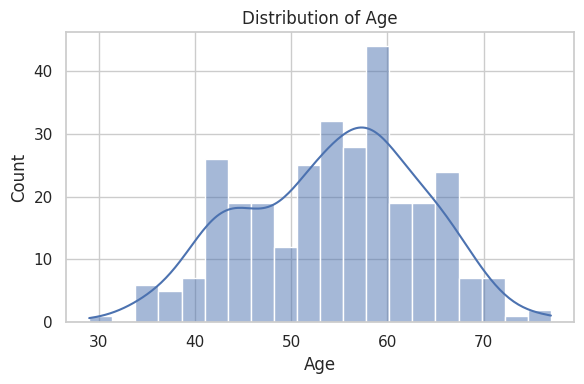

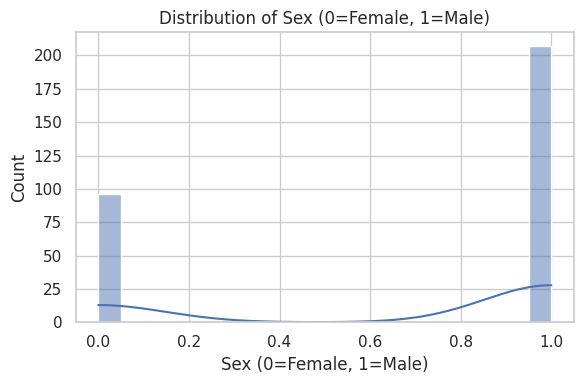

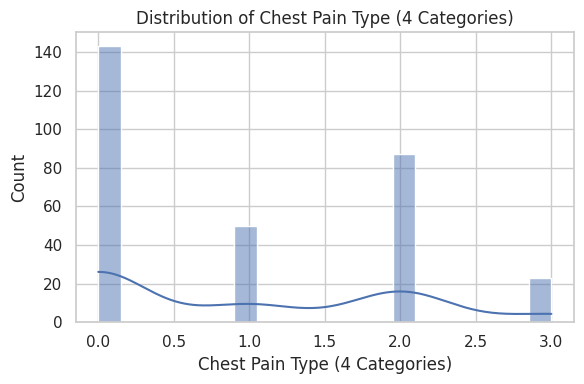

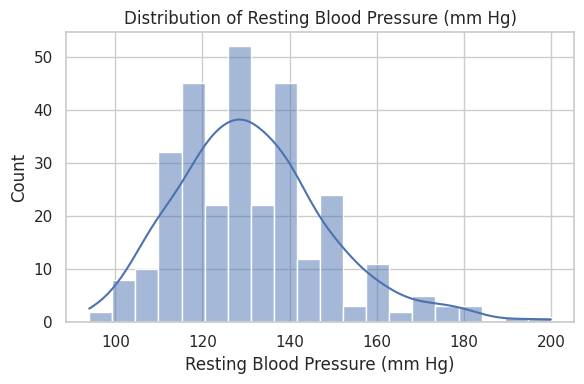

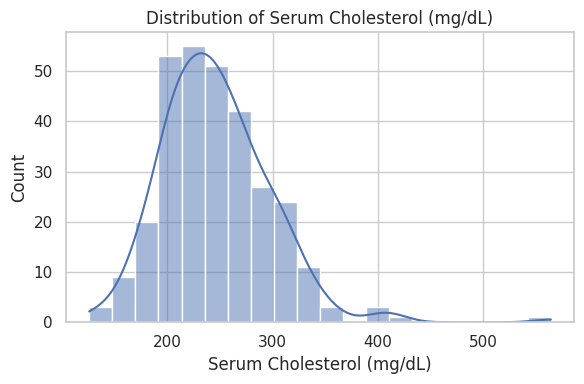

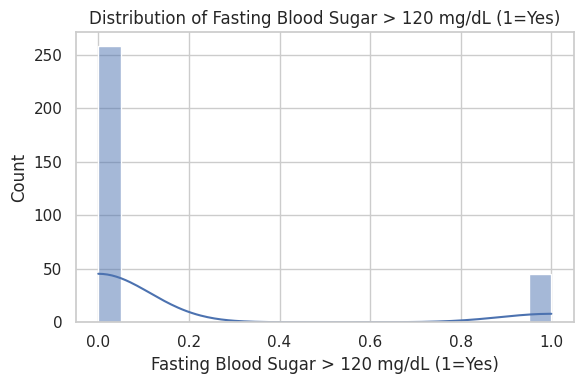

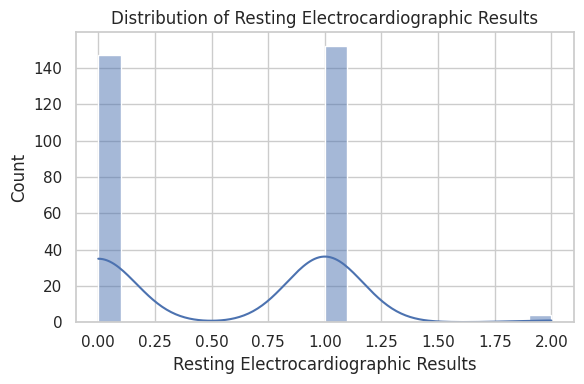

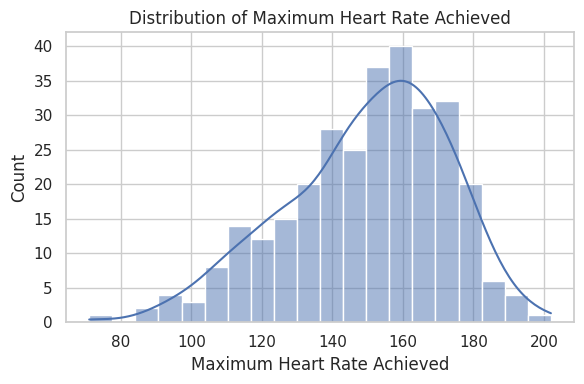

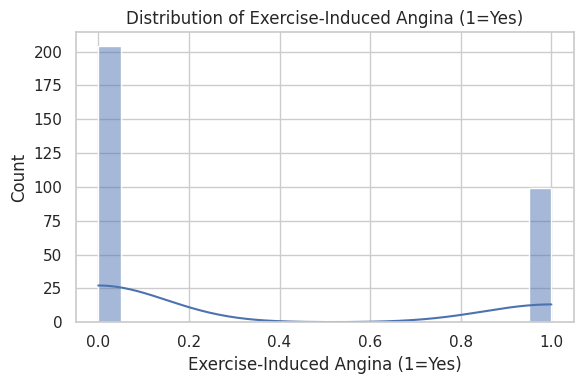

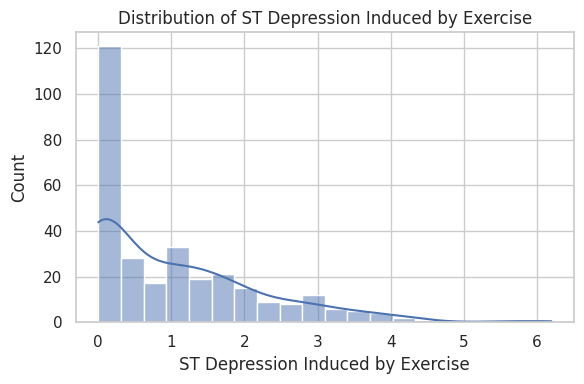

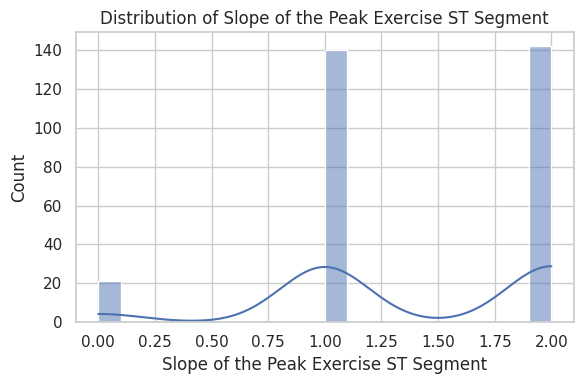

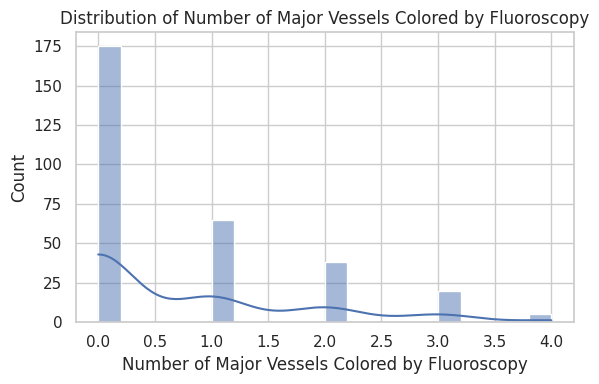

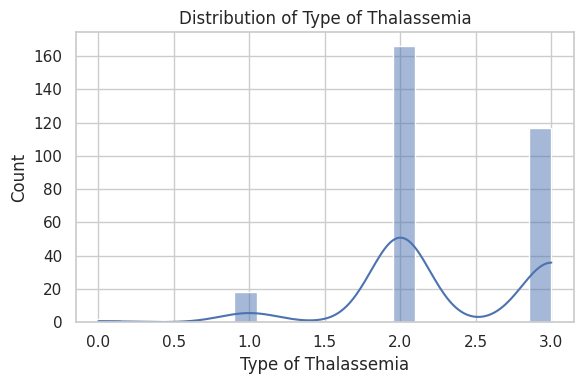

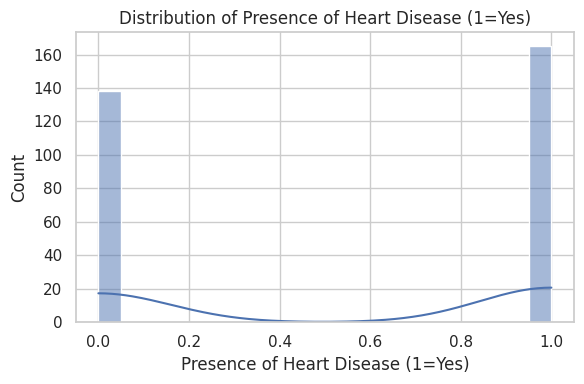

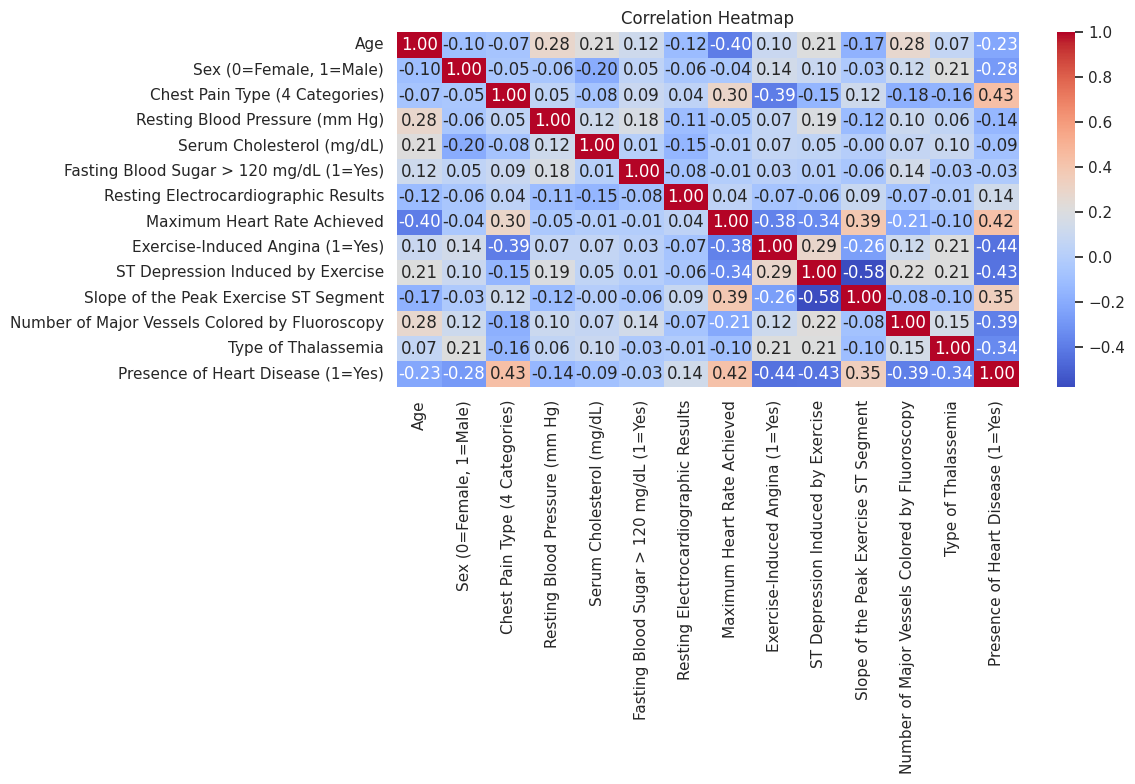

/tmp/ipython-input-2285250759.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-2285250759.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])   # Replace 0/1 with readable labels


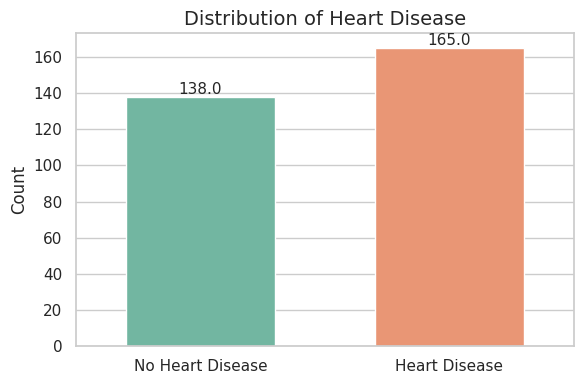

In [4]:
# ──────────────── SET VISUAL STYLE ────────────────
sns.set(style="whitegrid")  # Use seaborn's whitegrid style for cleaner plots

# ──────────────── i) DISTRIBUTION PLOTS FOR EACH FEATURE ────────────────
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=20)        # Histogram with KDE for each feature
    plt.title(f"Distribution of {column}")             # Dynamic title based on column name
    plt.xlabel(column)                                 # Set x-axis label
    plt.ylabel("Count")                                # Set y-axis label
    plt.tight_layout()
    plt.show()

# ──────────────── ii) CORRELATION HEATMAP ────────────────
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # Keep only numeric features
correlation = numeric_df.corr()                              # Compute pairwise correlations
sns.heatmap(
    correlation,
    annot=True, fmt=".2f", cmap="coolwarm"                   # Annotate with two decimals, use diverging color map
)
plt.title("Correlation Heatmap")                             # Set heatmap title
plt.tight_layout()
plt.show()

# ──────────────── iii) DISTRIBUTION OF TARGET VARIABLE ────────────────
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    x='Presence of Heart Disease (1=Yes)',
    data=df,
    palette='Set2',
    width=0.6
)

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',                                # Count value
        (p.get_x() + p.get_width() / 2., p.get_height()),   # Position text at center top of bar
        ha='center', va='bottom', fontsize=11
    )

# Customize plot aesthetics
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])   # Replace 0/1 with readable labels
ax.set_title('Distribution of Heart Disease', fontsize=14)  # Set plot title
ax.set_xlabel('')                                           # Remove x-axis label
ax.set_ylabel('Count')                                      # Set y-axis label

plt.tight_layout()
plt.show()


In [5]:
# ──────────────── BASIC CLEANING AND TYPE CONVERSION ────────────────

# Print the shape of the dataset
print("Dataset dimensions (rows, columns):", df.shape)

# Remove rows where the number of major vessels equals 4 (potential outliers or invalid category)
df = df[df['Number of Major Vessels Colored by Fluoroscopy'] != 4]

# Define columns that should be treated as categorical
categorical_columns = [
    'Sex (0=Female, 1=Male)',
    'Chest Pain Type (4 Categories)',
    'Fasting Blood Sugar > 120 mg/dL (1=Yes)',
    'Resting Electrocardiographic Results',
    'Exercise-Induced Angina (1=Yes)',
    'Slope of the Peak Exercise ST Segment',
    'Number of Major Vessels Colored by Fluoroscopy',
    'Type of Thalassemia',
    'Presence of Heart Disease (1=Yes)'
]

# Convert selected columns to categorical data type
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Print data types for all columns, flagging which ones are categorical
for col in df.columns:
    dtype = df[col].dtype
    cat_flag = " (categorical)" if dtype.name == 'category' else ""
    print(f"{col}: {dtype}{cat_flag}")


Dataset dimensions (rows, columns): (303, 14)
Age: int64
Sex (0=Female, 1=Male): category (categorical)
Chest Pain Type (4 Categories): category (categorical)
Resting Blood Pressure (mm Hg): int64
Serum Cholesterol (mg/dL): int64
Fasting Blood Sugar > 120 mg/dL (1=Yes): category (categorical)
Resting Electrocardiographic Results: category (categorical)
Maximum Heart Rate Achieved: int64
Exercise-Induced Angina (1=Yes): category (categorical)
ST Depression Induced by Exercise: float64
Slope of the Peak Exercise ST Segment: category (categorical)
Number of Major Vessels Colored by Fluoroscopy: category (categorical)
Type of Thalassemia: category (categorical)
Presence of Heart Disease (1=Yes): category (categorical)


/tmp/ipython-input-2945562155.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')


In [6]:
# ──────────────── MANUAL ONE-HOT ENCODING FOR CATEGORICAL VARIABLES ────────────────

# Sex (0 = Female, 1 = Male)
df['Sex: Female'] = df['Sex (0=Female, 1=Male)'].apply(lambda x: 1 if x == 0 else 0)
df['Sex: Male'] = df['Sex (0=Female, 1=Male)'].apply(lambda x: 1 if x == 1 else 0)

# Chest Pain Type: 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal pain, 3 = Asymptomatic
df['Chest Pain: Typical Angina'] = df['Chest Pain Type (4 Categories)'].apply(lambda x: 1 if x == 0 else 0)
df['Chest Pain: Atypical Angina'] = df['Chest Pain Type (4 Categories)'].apply(lambda x: 1 if x == 1 else 0)
df['Chest Pain: Non-Anginal'] = df['Chest Pain Type (4 Categories)'].apply(lambda x: 1 if x == 2 else 0)
df['Chest Pain: Asymptomatic'] = df['Chest Pain Type (4 Categories)'].apply(lambda x: 1 if x == 3 else 0)

# Fasting Blood Sugar > 120 mg/dL: 1 = Yes, 0 = No
df['Fasting Blood Sugar: Yes'] = df['Fasting Blood Sugar > 120 mg/dL (1=Yes)'].apply(lambda x: 1 if x == 1 else 0)
df['Fasting Blood Sugar: No'] = df['Fasting Blood Sugar > 120 mg/dL (1=Yes)'].apply(lambda x: 1 if x == 0 else 0)

# Resting ECG: 0 = Normal, 1 = ST Abnormality, 2 = Left Ventricular Hypertrophy
df['Resting ECG: Normal'] = df['Resting Electrocardiographic Results'].apply(lambda x: 1 if x == 0 else 0)
df['Resting ECG: ST Abnormality'] = df['Resting Electrocardiographic Results'].apply(lambda x: 1 if x == 1 else 0)
df['Resting ECG: Left Ventricular Hypertrophy'] = df['Resting Electrocardiographic Results'].apply(lambda x: 1 if x == 2 else 0)

# Exercise-Induced Angina: 1 = Yes, 0 = No
df['Exercise-Induced Angina: Yes'] = df['Exercise-Induced Angina (1=Yes)'].apply(lambda x: 1 if x == 1 else 0)
df['Exercise-Induced Angina: No'] = df['Exercise-Induced Angina (1=Yes)'].apply(lambda x: 1 if x == 0 else 0)

# Slope of the Peak Exercise ST Segment: 0 = Upsloping, 1 = Flat, 2 = Downsloping
df['ST Slope: Upsloping'] = df['Slope of the Peak Exercise ST Segment'].apply(lambda x: 1 if x == 0 else 0)
df['ST Slope: Flat'] = df['Slope of the Peak Exercise ST Segment'].apply(lambda x: 1 if x == 1 else 0)
df['ST Slope: Downsloping'] = df['Slope of the Peak Exercise ST Segment'].apply(lambda x: 1 if x == 2 else 0)

# Thalassemia Type: 0 = Normal, 1 = Fixed Defect, 2 = Reversible Defect
df['Thalassemia: Normal'] = df['Type of Thalassemia'].apply(lambda x: 1 if x == 0 else 0)
df['Thalassemia: Fixed Defect'] = df['Type of Thalassemia'].apply(lambda x: 1 if x == 1 else 0)
df['Thalassemia: Reversible Defect'] = df['Type of Thalassemia'].apply(lambda x: 1 if x == 2 else 0)


In [7]:
# Display the first 10 rows of the updated DataFrame
print("📋 First 10 rows of the dataset:")
display(df.head(10))  # use print(df.head(10)) if not in Jupyter

# Show all column names with their data types
print("\n📊 Column Names and Data Types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

📋 First 10 rows of the dataset:


,Age,"Sex (0=Female, 1=Male)",Chest Pain Type (4 Categories),Resting Blood Pressure (mm Hg),Serum Cholesterol (mg/dL),Fasting Blood Sugar > 120 mg/dL (1=Yes),Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise-Induced Angina (1=Yes),ST Depression Induced by Exercise,...,Resting ECG: ST Abnormality,Resting ECG: Left Ventricular Hypertrophy,Exercise-Induced Angina: Yes,Exercise-Induced Angina: No,ST Slope: Upsloping,ST Slope: Flat,ST Slope: Downsloping,Thalassemia: Normal,Thalassemia: Fixed Defect,Thalassemia: Reversible Defect
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,0,1,1,0,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,0,1,1,0,0,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,0,1,0,0,1,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,1,0,0,1,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,1,0,0,0,1,0,0,1
5,57,1,0,140,192,0,1,148,0,0.4,...,1,0,0,1,0,1,0,0,1,0
6,56,0,1,140,294,0,0,153,0,1.3,...,0,0,0,1,0,1,0,0,0,1
7,44,1,1,120,263,0,1,173,0,0.0,...,1,0,0,1,0,0,1,0,0,0
8,52,1,2,172,199,1,1,162,0,0.5,...,1,0,0,1,0,0,1,0,0,0
9,57,1,2,150,168,0,1,174,0,1.6,...,1,0,0,1,0,0,1,0,0,1



📊 Column Names and Data Types:
Age: int64
Sex (0=Female, 1=Male): category
Chest Pain Type (4 Categories): category
Resting Blood Pressure (mm Hg): int64
Serum Cholesterol (mg/dL): int64
Fasting Blood Sugar > 120 mg/dL (1=Yes): category
Resting Electrocardiographic Results: category
Maximum Heart Rate Achieved: int64
Exercise-Induced Angina (1=Yes): category
ST Depression Induced by Exercise: float64
Slope of the Peak Exercise ST Segment: category
Number of Major Vessels Colored by Fluoroscopy: category
Type of Thalassemia: category
Presence of Heart Disease (1=Yes): category
Sex: Female: category
Sex: Male: category
Chest Pain: Typical Angina: int64
Chest Pain: Atypical Angina: int64
Chest Pain: Non-Anginal: int64
Chest Pain: Asymptomatic: int64
Fasting Blood Sugar: Yes: category
Fasting Blood Sugar: No: category
Resting ECG: Normal: int64
Resting ECG: ST Abnormality: int64
Resting ECG: Left Ventricular Hypertrophy: int64
Exercise-Induced Angina: Yes: category
Exercise-Induced Angina

In [8]:
# ──────────────── SAVE AND DOWNLOAD ENCODED DATAFRAME ────────────────

# Save the encoded DataFrame to a CSV file
df.to_csv('encoded_heart_disease_data.csv', index=False)

# Import Colab file module and trigger download
files.download('encoded_heart_disease_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>